# Data Exploration Iteration 2

Since the outcomes of the model defined in <b>USAccidents_model_def_train_evaluate1.0.ipynb</b> were not convincing, a deeper dive into the time progression of the data willbe made, in order to understand why the models are giving the one-hot encoding of variable 'Year_2020' such a great prediction importance.

## Plot Time Progression of Severity

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# import original version of data

df = pd.read_csv('US_Accidents_June20.csv', index_col=False)
print('df.columns.shape:', df.columns.shape)
print('df.columns:', df.columns)

df.columns.shape: (49,)
df.columns: Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')


Looks like the data was correctly imported!

In [14]:
#As in the original dataset, typecast dates and timestamps to datetime format

df['Start_Time'] = pd.to_datetime(df.Start_Time, format='%Y-%m-%d %H:%M:%S')
df['End_Time'] = pd.to_datetime(df.End_Time, format='%Y-%m-%d %H:%M:%S')
df['Weather_Timestamp'] = pd.to_datetime(df.Weather_Timestamp, format='%Y-%m-%d %H:%M:%S')

In [16]:
#Divide timestamps in Year, Month, Weekday, Day, Hour, Minute
#Year
df['Year'] = df['Start_Time'].dt.year

#Month
n_month = df['Start_Time'].dt.month
df['Month'] = n_month

#Weekday
df['Weekday']= df['Start_Time'].dt.weekday

#Day as number between 1-365
days_each_month = np.cumsum(np.array([0,31,28,31,30,31,30,31,31,30,31,30,31]))
nday = [days_each_month[arg-1] for arg in n_month.values]
nday = nday + df["Start_Time"].dt.day.values
df['Day'] = nday

#Hour
df['Hour'] = df['Start_Time'].dt.hour

#Minute
df['Minute']=df['Hour']*60.0+df["Start_Time"].dt.minute

print('Number of features after feature creation:', df.columns.shape[0])
print()

df.loc[:5, ['Year', 'Month', 'Weekday', 'Day', 'Hour', 'Minute']]

Number of features after feature creation: 55



,Year,Month,Weekday,Day,Hour,Minute
0,2016,2,0,39,5,346.0
1,2016,2,0,39,6,367.0
2,2016,2,0,39,6,409.0
3,2016,2,0,39,7,443.0
4,2016,2,0,39,7,459.0
5,2016,2,0,39,7,464.0


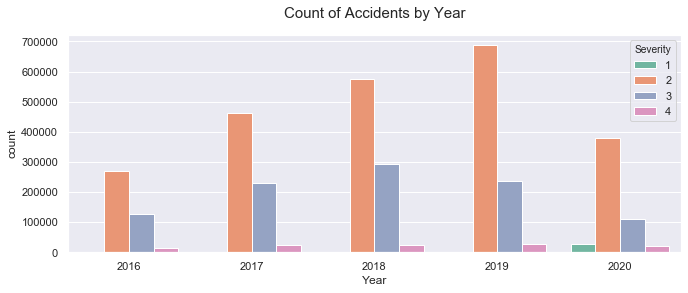

In [24]:
# plot severity time prograssion
df.Year = df.Year.astype(str)

sns.countplot(x='Year', hue='Severity', data=df ,palette="Set2")
plt.title('Count of Accidents by Year', size=15, y=1.05)
plt.show()

It looks like there are almost no Severity 1 accidents. For the rest of accidents, we have to notice that for 2020 we are only counting the accidents until June, so the amount of accidents and its distribution looks reasonable. Let's look again at how the severity is defined.<br><br>

Looking at the source of the data, we find it. <br>
<b>Severity:</b> 'Shows the severity of the accident, a number between 1 and 4, where 1 indicates the least impact on traffic (i.e., short delay as a result of the accident) and 4 indicates a significant impact on traffic (i.e., long delay).'<br>
So the two most important columns for Severity should be <b>Duration</b> (as defined in the USAccidents_data_exp1.0.ipynb) and <b>Distance</b> ('The length of the road extent affected by the accident').

## Plot Severity against Duration and Distance